# 04 - 图因果模型


## 思考因果关系

你有没有注意到 YouTube 视频中的那些厨师是如何出色地描述食物的？ “减少酱汁，直到达到天鹅绒般的稠度”。如果您刚刚开始学习如何烹饪，您甚至可能都不知道这意味着什么。给我点时间让我娓娓道来！对于因果关系，这是一回事。如果你走进一家酒吧，听到人们讨论因果关系（可能是经济系旁边的一家酒吧），你会听到他们讨论在确认移民对一个社区的影响的时候，收入这个混淆因子如何使得分析变得困难，所以他们不得不使用工具变量。到现在为止，您可能不明白他们在说什么。不过，我现在会开始试图解决一部分问题。

图形模型是因果关系的语言。它们不仅是您用来与其他勇敢而真实的因果关系爱好者交谈的工具，也是您用来使自己的想法更清晰的工具。

让我们以潜在结果的条件独立性为第一个例子来展开讲解。这个条件是我们在进行因果推断时需要为真的主要假设之一：

$
(Y_0, Y_1) \perp T | X
$

条件独立性使我们有可能衡量完全由于干预对结果产生的影响，而不是任何其他潜伏在周围的变量。一个典型的例子是药物对病人的影响。如果只有重病患者才能服用这种药物，那么服用这种药物甚至可能会降低患者的健康。那是因为严重程度的影响与药物的影响混淆了。但是，如果我们将患者按重症和非重症病例分类，并分析每个子分类小组中的药物影响，我们将更清楚地了解真正的效果是什么。这种按特征拆解样本的方法就是我们所说的对 X 的控制或调节。通过对严重病例进行调节，治疗机制变得和随机一样好。严重组中的患者可能会或可能不会仅仅因为偶然而接受药物，而不是因为高严重性，因为所有患者在这个维度上都是相同的。如果治疗就像在组内随机分配一样，则治疗有条件地独立于潜在结果。

独立性和条件独立性是因果推理的核心。然而，仅仅围绕这些概念展开会让学习很困难。另一方面，如果我们使用正确的语言来描述这个问题，会让困难减轻一点。这就是**因果图模型**的用武之地。因果图模型是一种表示因果关系如何起作用的方式，即是什么导致了什么。

图模型如下所示

In [1]:
'''
In Anaconda environment, use the following command to successfully install and import graphviz:

>conda install -c anaconda graphviz python-graphviz
>python -m "import graphviz as g"
'''
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

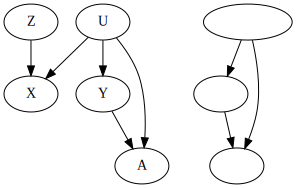

In [12]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")
g.edge('Y', 'A')
g.edge('U', 'A')

g.edge("药物", "存活")
g.edge("严重程度", "存活")
g.edge("严重程度", "药物")

g

每个节点都是一个随机变量。我们使用箭头或边来显示一个变量是否会导致另一个变量的变化。在上面的第一个图形模型中，我们说 Z 导致 X，U 导致 X 和 Y。举一个更具体的例子，我们可以将药物对患者生存影响的想法转化为上面的第二个图形。疾病严重程度会同时导致服药的干预和病人的存活，服药本身也带来病人的存活。正如我们将看到的，这种因果图模型语言将帮助我们更清晰地思考因果关系，因为它明确了我们对世界如何运作的信念。

## 图模型快速入门

图模型本身可能需要一整个学期的[课程](https://www.coursera.org/specializations/probabilistic-graphical-models)。但是，就我们的目的而言，了解图模型需要什么样的独立性和条件独立性假设是（非常）重要的。正如我们将看到的，独立性通过图形模型展开，就像水流过溪流一样。我们可以停止这个流程，也可以启用它，这取决于我们如何处理其中的变量。为了理解这一点，让我们检查一些常见的图形结构和示例。它们非常简单，但这些基本模块足以帮助我们理解图模型上有关独立性和条件独立性的所有内容。

首先，看看这个非常简单的图。 A导致B，B导致C。或者X导致Y导致Z。

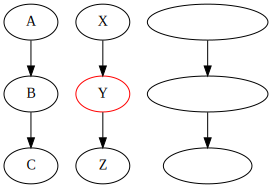

In [14]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("因果推断知识", "解决业务问题")
g.edge("解决业务问题", "职位晋升")

g

在第一个图中，依赖性沿箭头方向流动。举一个更具体的例子，假设懂得因果推断的知识是解决业务问题的唯一途径，而解决这些问题是获得工作晋升的唯一途径。因此，因果知识导致问题解决，从而导致工作晋升。在这里我们可以说职位晋升依赖于因果知识。因果知识越多，获得晋升的机会就越大。请注意，依赖性是对称的，尽管它不太直观。你升职的机会越大，反过来说明你有因果推断知识的概率就越大，否则就很难升职。

现在，假设我以中间变量为条件。在这种情况下，依赖被阻塞。因此，给定 Y，X 和 Z 是独立的。在上图中，红色表示 Y 是一个条件变量。出于同样的原因，在我们的示例中，如果我知道您擅长解决问题，那么知道您知道因果推理并不会提供有关您获得工作晋升机会的任何进一步信息。在数学上，\\(E[Promotion|Solve \ questions, Causal \ knowledge]=E[Promotion|Solve \ questions]\\)。反之亦然，一旦我知道你在解决问题方面有多擅长，了解你的工作晋升状态不会让我进一步了解你知道因果推断的可能性。

作为一般规则，当我们以中间变量 C 为条件时，从 A 到 B 的直接路径中的依赖流被阻塞。或者，

$A \not\!\perp\!\!\!\perp B$

和

$
A \!\perp\!\!\!\perp B | C
$

现在，让我们考虑一个分叉结构。在这种情况下，同一个变量会导致图中的其他两个变量。在这种情况下，依赖关系通过箭头向后流动，我们有所谓的**后门路径**。我们可以通过以共同原因为条件来关闭后门路径并关闭依赖。

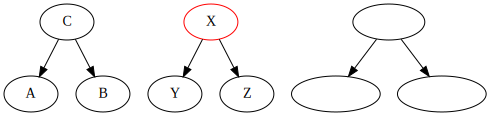

In [13]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("统计学", "因果推断")
g.edge("统计学", "机器学习")

g

看下面这个例子。假设您对统计学的了解使您对因果推理和机器学习都有了更多的了解。在我不知道你的统计知识水平的情况下，如果知道你擅长因果推理，就能推断更有可能你也擅长机器学习。这是因为，即使我不知道你的统计知识水平，我也可以从你的因果推理知识中推断出来：如果你擅长因果推理，你可能擅长统计学，这也让你更有可能擅长在机器学习方面。

现在，如果我以你对统计学的知识为已知条件，那么你对机器学习的了解程度将与你对因果推理的了解程度无关。你看，知道你的统计水平已经为我提供了推断你的机器学习技能水平所需的所有信息。在这种情况下，了解您的因果推理水平不会提供更多的信息。

作为一般规则，共享一个同一个原因的两个变量是相关的，但当我们以共同原因为条件时它们则是独立的。数学上可以表示为：

$A \not\!\perp\!\!\!\perp B$

和

$
A \!\perp\!\!\!\perp B | C
$

唯一缺少的结构是受冲突因子（collider，有部分中文资料将其直接翻译为对撞机，感觉比较生硬）。当两个箭头在单个变量上相遇，我们就称这种现象为冲突。我们可以说，在这种情况下，两个变量共享一个共同的效果。

In [ ]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

例如，考虑有两种方法可以得到工作晋升。你要么擅长统计，要么奉承你的老板。如果我不以你的职位晋升为条件，也就是说，我不知道你是否会得到或不会得到，那么你的统计和奉承水平是独立的。换句话说，知道你在统计方面有多好，我无法说明你在奉承老板方面有多好。另一方面，如果您确实获得了工作晋升，那么突然之间，了解您的统计数据水平会告诉我您的奉承程度。如果你不擅长统计并且确实得到了晋升，那么你更有可能知道如何奉承，否则你就不会得到晋升。相反，如果你不擅长奉承，那一定是你擅长统计。这种现象有时被称为 **explaining away**，因为一个原因已经解释了结果，使另一个原因不太可能。

作为一般规则，对碰撞器的调节会打开依赖路径。不调节它会使其关闭。或者

$A \!\perp\!\!\!\perp B$

和

$
A \not\!\perp\!\!\!\perp B | C
$

知道了这三种结构，我们可以推导出更一般的规则。一条路径被阻塞当且仅当：
1. 它包含一个被条件化的非冲突因子
2. 它包含一个没有被条件化的冲突因子并且没有被条件化的后代。

这是一个关于依赖如何在图中流动的备忘单。我摘自 Mark Paskin 的 [斯坦福演讲](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf)。尖端带线的箭头表示独立，尖端不带线的箭头表示依赖。

![img](data/img/graph-flow.png)

作为最后一个例子，试着在下面的因果图中找出一些独立和依赖关系。
1. 是 \\(D \perp C\\) 吗？
2. 是 \\(D \perp C| A \\) 吗？
3. 是 \\(D \perp C| G \\) 吗？
4. 是 \\(A \perp F \\) 吗？
5. 是 \\(A \perp F|E \\) 吗？
6. 是 \\(A \perp F|E,C \\) 吗？

In [ ]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**答案**：
1. \\(D \perp C\\)。它包含一个 **未** 对其进行调节的冲突因子。
2. \\(D \not\perp C| A \\)。它包含一个对其进行调节的冲突因子。
3. \\(D \not\perp C| G \\)。它包含一个受条件限制的冲突因子的后代。您可以在此处将 G 视为 A 的某种代理。
4. \\(A \perp F \\)。它包含一个对撞机，B->E<-F，它**没有**受到限制。
5. \\(A \not\perp F|E \\)。它包含一个碰撞器，B->E<-F，它已被调节。
6. \\(A \perp F|E, C \\)。它包含一个冲突因子，B->E<-F，它被条件化了，但它包含一个非冲突因子，它已经被条件化了。 E 上的条件化打开了路径，但 C 上的条件化再次关闭了它。

了解因果图模型使我们能够理解因果推理中出现的问题。正如我们所见，问题总是归结为偏差。

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

图形模型使我们能够诊断我们正在处理的偏见以及我们需要纠正它们的工具是什么。

## 混淆偏差

![img](./data/img/causal-graph/both_crap.png)

偏差（bias）的第一个主要原因是混淆（confounding）。当干预和结果有共同的原因时，就会发生这种情况。例如，假设干预是接受教育，结果是收入，这时很难知道接受教育对工资的因果关系，因为两者都有一个共同的原因：智力。所以我们可以提出这样的论点，即受教育程度越高的人赚的钱越多，仅仅是因为他们更聪明，而不是因为他们受过更多的教育。为了确定因果效应，我们需要关闭干预和结果之间的所有后门路径。如果我们这样做，剩下的唯一效果就是直接效果 T->Y。在我们的例子中，如果我们控制智力，即我们比较智力水平相同但受教育程度不同的人，结果的差异将仅是由于受教育程度的不同，因为比较中的每个人其智力是一样的。为了解决混淆偏差，我们需要控制治疗和结果的所有常见原因。

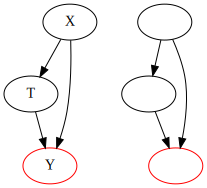

In [25]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")
g.node('Y', 'Y', color='red')

g.edge("智力", "教育"),
g.edge("智力", "工资"),
g.edge("教育", "工资")
g.node("工资", "工资", color='red')
g

不幸的是，并非总是可以控制所有常见原因。 有时，存在我们无法衡量的未知原因或已知原因。 智力的情况是后者之一。 尽管付出了很多努力，但科学家们还没有弄清楚如何很好地衡量智力。 我将在这里使用 U 表示未测量的变量。 现在，假设智力不能直接影响你的教育。 它只会影响你在 SAT 上的表现，但 SAT 决定了你的教育水平，因为它开启了进入一所好大学的可能性。 即使我们无法控制不可测量的情报，我们也可以控制 SAT 并关闭后门路径。

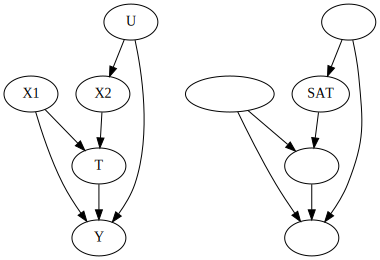

In [18]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("家庭收入", "教育")
g.edge("教育", "工资")
g.edge("SAT", "教育")
g.edge("家庭收入", "工资")
g.edge("智力", "SAT")
g.edge("智力", "工资")
g

在下图中，对 X1 和 X2 或 SAT 和家庭收入的调节足以关闭处理和结果之间的所有后门路径。换句话说，\\((Y_0, Y_1) \perp T | X1, X2\\)。因此，即使我们无法测量所有常见原因，如果我们控制可测量的变量，这些变量可以调节未测量对治疗的影响，我们仍然可以获得条件独立性。快速说明一下，我们也有 \\((Y_0, Y_1) \perp T | X1, U\\)，但是由于我们无法观察 U，因此我们不能以它为条件。

但如果情况并非如此呢？如果未测量的变量直接导致治疗和结果怎么办？在下面的例子中，智力直接导致教育和收入。因此，治疗教育与结果工资之间的关系存在混淆。在这种情况下，我们无法控制混杂因素，因为它是不可测量的。但是，我们还有其他测量变量可以作为混杂因素的代理。这些变量不在后门路径中，但控制它们将有助于降低偏差（但不会消除偏差）。这些变量有时被称为替代混杂因素。

在我们的例子中，我们不能测量智力，但我们可以测量它的一些原因，比如父亲和母亲的教育，以及它的一些影响，比如 IQ 或 SAT 分数。控制这些替代变量不足以消除偏差，但它确实有帮助。

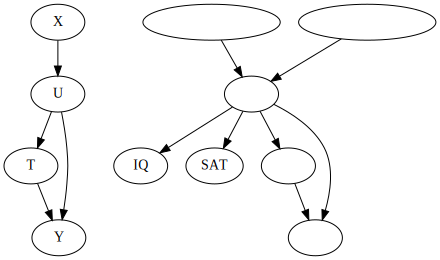

In [19]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("智力", "IQ")
g.edge("智力", "SAT")
g.edge("父亲受教育水平", "智力")
g.edge("母亲受教育水平", "智力")

g.edge("智力", "教育")
g.edge("教育", "工资")
g.edge("智力", "工资")

g

## 选择偏差

您可能认为将所有可以测度的信息添加到模型中是一个好主意，以确保没有混淆偏差。嗯，再想想。

![image.png](./data/img/causal-graph/selection_bias.png)

偏差的第二大来源是我们所说的选择偏差。如果当我们没有控制一个共同的原因时会发生混淆偏差，那么选择偏差则与最终效果更相关。这里要提醒一句，经济学家倾向于将各种偏见称为选择偏差。在这里，我认为区分它和混淆偏见是很有帮助的，所以我会坚持下去。

通常情况下，当我们控制的变量比我们应该控制的多时，就会出现选择偏差。可能的情况是干预和潜在结果是略微独立的，但一旦我们以冲突因子为条件就变得相互依赖了。

想象一下，在某个奇迹的帮助下，您终于能够随机化教育以衡量其对工资的影响。但是为了确保您不会混淆，您可以控制很多变量。其中，您控制投资。但投资并不是教育和工资的共同原因。相反，它是两者的结果。受过更多教育的人既赚得更多，投资也更多。此外，那些赚得更多的人投资更多。由于投资是一个冲突因子，通过对它进行调节，您在处理和结果之间开辟了第二条路径，这将使衡量直接影响变得更加困难。一种思考方式是，通过控制投资，您可以查看投资相同的小部分人群，然后发现教育对这些群体的影响。但是通过这样做，您也间接地和无意地不允许工资发生太大变化。结果，您将无法看到教育如何改变工资，因为您不允许工资按应有的方式变化。

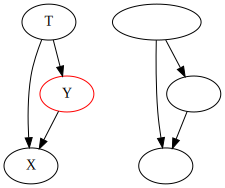

In [31]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("Y", "Y", color="red")

g.edge("教育水平", "投资")
g.edge("教育水平", "工资")
g.edge("工资", "投资")

g

为了说明为什么会这样，假设投资和教育仅采用 2 个值。人们要么投资，要么不投资。他们要么受过教育，要么没受过教育。最初，当我们不控制投资时，偏差项为零：\\(E[Y_0|T=1] - E[Y_0|T=0] = 0\\) 因为教育是随机的。这意味着人们在没有接受教育 \\(Wage_0\\) 的情况下获得的工资是相同的，如果他们接受或不接受教育治疗。但是，如果我们以投资为条件会发生什么？

看看那些投资的，我们可能有这样的情况\\(E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]\\)。换句话说，在那些投资的人中，那些即使没有受过教育也能做到的人，更能独立于教育来获得高收入。因此，这些人的工资 \\(Wage_0|T=0\\) 可能高于受过教育的群体在没有受过教育的情况下的工资，\\(Wage_0|T =1\\)。类似的推理可以应用于那些不投资的人，我们也可能有 \\(E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]\\) .那些即使受过教育也不投资的人，如果没有受过教育，他们的工资可能会低于那些没有投资但也没有受过教育的人。

使用纯粹的图形论证，如果有人投资，知道他们受过高等教育就可以解释第二个原因，那就是工资。以投资为条件，高等教育与低工资相关，我们有一个负偏差\\(E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]\\)。

顺便提一下，如果我们以共同效应的任何后代为条件，那么我们讨论的所有这些也是正确的。

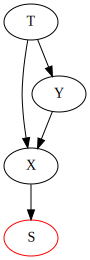

In [21]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

当我们以干预的中介为条件时，也会发生类似的事情。 中介是干预和结果之间的变量，其作用是调解因果关系。 例如，再次假设您能够随机化教育。 但是，为了更好确定干预因子的影响，您决定控制此人是否有白领工作。 正如以前曾经看到的一样，这种条件化会使因果效应估计产生偏差。 不过这次不是因为它用冲突因子打开了前门路径，而是因为它关闭了干预因子影响结果的通道之一。 在我们的例子中，获得一份白领工作是更多教育导致更高工资的一种方式。 通过控制它，我们关闭了这个渠道，只留下教育对工资的直接影响。

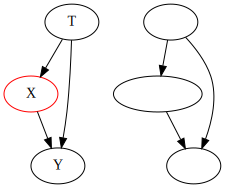

In [22]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("教育", "白领工作")
g.edge("教育", "工资")
g.edge("白领工作", "工资")

g

为了给出潜在的结果参数，我们知道，由于随机化，偏差为零 \\(E[Y_0|T=0] - E[Y_0|T=1] = 0\\)。然而，如果我们以白领个人为条件，我们有 \\(E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]\\)。那是因为那些即使没有受过教育也能找到一份白领工作的人可能比那些需要教育帮助才能得到同样工作的人更努力工作。同理，\\(E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]\\) 因为那些即使受过教育也没有得到白领工作的人可能比那些没有工作但也没有受过任何教育的人更努力。

在我们的例子中，对中介的调节会导致负面偏见。它使教育的效果看起来比实际要低。这是因为因果效应是积极的。如果效果是负面的，则对中介的调节会产生积极的偏见。在所有情况下，这种调节会使效果看起来比实际更弱。

更通俗地说，假设您必须在两个候选人之间做出选择，才能在您的公司工作。两者都有同样令人印象深刻的专业成就，但一个没有高等教育学位。你应该选择哪一个？当然，您应该选择没有受过高等教育的人，因为他设法实现了与另一个人相同的目标，但对他不利。

![image.png](./data/img/causal-graph/three_bias.png)

## 关键思想

我们研究了图形模型作为一种语言，以更好地理解和表达因果关系的想法。我们对图上的条件独立规则做了一个快速总结。这有助于我们探索可能导致偏见的三种结构。

第一个是混淆，当治疗和结果有一个我们无法解释或控制的共同原因时，就会发生这种情况。第二个是由于对共同效应进行调节而导致的选择偏差。即使治疗是随机分配的，这种过度控制也会导致偏差。第三种结构也是选择偏差的一种形式，这次是由于对中介变量的过度控制。选择偏差通常可以通过简单地什么都不做来解决，这就是它如此危险的原因。由于我们偏向于行动，因此我们倾向于将控制事物的想法视为聪明的想法，因为它们可能弊大于利。

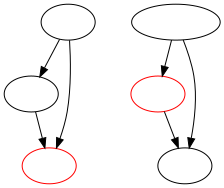

In [30]:
g = gr.Digraph()
g.edge("智力", "教育")
g.edge("智力", "工资")
g.edge("教育", "工资")
g.node('工资', '工资', color='red')


g.edge("教育水平", "收入")
g.edge("教育水平", "投资")
g.edge("收入", "投资")
g.node('收入', '收入', color='red')

g